In [1]:
# import all libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import math

In [2]:
# load csv
base_df = pd.read_csv('atp_transformed/2000-2024 players_3.csv')

C:\Users\Golbe\AppData\Local\Temp\ipykernel_7440\872059729.py:2: DtypeWarning: Columns (18,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  base_df = pd.read_csv('atp_transformed/2000-2024 players_3.csv')


In [3]:
full_df = base_df
len(full_df)

1282807

In [ ]:
selected_features = [
#     'surface', 
# 'tourney_level', 
# 'tourney_date', # dropped because not numeric 
'match_num', 
'player_height', 
# 'player_country', 
'player_age', 
# 'elo_pre_match', # dropped because of colinearity
# 'opponent_elo_pre_match', 
'opponent_rank', 
# 'mean_numb', # dropped as the rolling means are derrivitives of these columns and adding them creates a worse model
# 'median_numb', 
# 'total_numb', 
# 'mean_diff', 
# 'median_diff', 
# 'total_diff', 
# 'mean_tb_numb', 
# 'median_tb_numb', 
# 'total_tb_numb', 
# 'mean_tb_diff', 
# 'median_tb_diff', 
# 'total_tb_diff', 
'days_of_experience',
# 'career_year', 
# 'rest_days', 
'set_dominance', 
'tb_dominance', 
'highest_finish_position', 
'draw_size_rolling_med_10', 
'highest_finish_position_rolling_med_10', 
'ace_rolling_mean_10', 
'double_faults_rolling_mean_10', 
'points_on_serve_rolling_mean_10', 
'first_serve_in_rolling_mean_10', 
'1stWon_rolling_mean_10', 
'2ndWon_rolling_mean_10', 
'service_games_rolling_mean_10', 
'break_points_saved_rolling_mean_10', 
'break_points_faced_rolling_mean_10', 
'elo_pre_match_rolling_mean_10',
'opponent_elo_pre_match_rolling_mean_10', 
'set_dominance_rolling_mean_10', 
'tb_dominance_rolling_mean_10', 
#'player_rank_rolling_mean_10', # dropped because the model will cheat with this if predicting rank
'mean_numb_rolling_mean_10', 
'median_numb_rolling_mean_10', 
'total_numb_rolling_mean_10', 
'mean_diff_rolling_mean_10', 
'median_diff_rolling_mean_10', 
'total_diff_rolling_mean_10', 
'mean_tb_numb_rolling_mean_10', 
'median_tb_numb_rolling_mean_10', 
'total_tb_numb_rolling_mean_10', 
'mean_tb_diff_rolling_mean_10', 
'median_tb_diff_rolling_mean_10', 
'total_tb_diff_rolling_mean_10', 
# 'elo_next_match',
'binned_rank' # target
]

In [5]:
full_df[['median_tb_diff','mean_tb_numb','median_tb_numb','mean_tb_diff','tb_dominance']] = full_df[['median_tb_diff','mean_tb_numb','median_tb_numb','mean_tb_diff','tb_dominance']].replace(np.nan,0)

In [ ]:
# bin the data using 1-25, 26-100, 101-300, 301-600, 601-1000, 1001-2268 bins as they represent the strength of players in a better way

bins = [1, 25, 100, 300, 600, 1000, 2268]
labels = [0, 1, 2, 3, 4, 5]

full_df['binned_rank'] = pd.cut(
    full_df['filled_player_rank'], 
    bins=bins, 
    labels=labels, 
    include_lowest=True
)

In [7]:
# # drop all nan values
# full_df = full_df.dropna(subset=['player_rank'])

# # log scale the rank
# full_df['log_rank'] = np.log(full_df['player_rank'])

# num_bins = 20

# # Bin the ranks
# full_df['binned_rank'] = pd.qcut(full_df['player_rank'], q=num_bins, labels=False) 

In [8]:
print(len(full_df))
df_subset = full_df[selected_features]
print(len(df_subset))

1282807
1282807


In [9]:
# select all features to use in the prediction
df_subset = full_df[selected_features]

df_subset.isna().sum().sort_values(ascending=False)

service_games_rolling_mean_10             706278
break_points_saved_rolling_mean_10        706278
double_faults_rolling_mean_10             706278
ace_rolling_mean_10                       706278
break_points_faced_rolling_mean_10        706278
1stWon_rolling_mean_10                    706278
first_serve_in_rolling_mean_10            706278
points_on_serve_rolling_mean_10           706278
2ndWon_rolling_mean_10                    706278
player_height                             456598
median_tb_diff_rolling_mean_10            112977
median_tb_numb_rolling_mean_10            112977
mean_tb_numb_rolling_mean_10              112977
tb_dominance_rolling_mean_10              112977
mean_tb_diff_rolling_mean_10              112977
opponent_rank                             107753
highest_finish_position_rolling_med_10     19971
median_diff_rolling_mean_10                19342
mean_diff_rolling_mean_10                  19342
set_dominance_rolling_mean_10              19342
mean_numb_rolling_me

In [10]:
# drop all values where nan because knn cannot deal with empty values
df_subset = df_subset.dropna()

In [11]:
df_subset.isna().sum().sort_values(ascending=False)

match_num                                 0
player_height                             0
player_age                                0
opponent_rank                             0
days_of_experience                        0
set_dominance                             0
tb_dominance                              0
highest_finish_position                   0
draw_size_rolling_med_10                  0
highest_finish_position_rolling_med_10    0
ace_rolling_mean_10                       0
double_faults_rolling_mean_10             0
points_on_serve_rolling_mean_10           0
first_serve_in_rolling_mean_10            0
1stWon_rolling_mean_10                    0
2ndWon_rolling_mean_10                    0
service_games_rolling_mean_10             0
break_points_saved_rolling_mean_10        0
break_points_faced_rolling_mean_10        0
elo_pre_match_rolling_mean_10             0
opponent_elo_pre_match_rolling_mean_10    0
set_dominance_rolling_mean_10             0
tb_dominance_rolling_mean_10    

From testing the categorical columns add no value to the prediction. Remoiving them creates a better model for all metrics

In [12]:
# # Print non numeric columns
print(len(df_subset))
# numeric_cols = df_subset.select_dtypes(exclude=[np.number]).columns
# print(numeric_cols)

# # encode non numeric values
# encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop first to avoid multicollinearity
# surface_encoded = encoder.fit_transform(df_subset[['surface','player_country','tourney_level']])
# surface_df = pd.DataFrame(surface_encoded, 
#                           columns=encoder.get_feature_names_out(['surface','player_country','tourney_level']),
#                           index=df_subset.index)
# df_encoded = pd.concat([df_subset.drop(['surface','player_country','tourney_level'], axis=1), surface_df], axis=1)
df_encoded = df_subset
print(len(df_encoded))

452296
452296


In [13]:
# prepare data
X = df_encoded.drop('binned_rank', axis=1)  # Features
y = df_encoded['binned_rank']  # Target

In [14]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# scale features to normalise
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# select K and weights based on library
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('knn', KNeighborsClassifier())
])

param_grid = {
    'knn__n_neighbors': list(range(1, 50))
}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

,n_neighbors,14
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [ ]:
# train
knn = KNeighborsClassifier(n_neighbors=14,weights='uniform') # k = 8 + weights = distance is good for 69.8
knn.fit(X_train_scaled, y_train)

,estimator,Pipeline(step...lassifier())])
,param_grid,"{'knn__n_neighbors': [1, 2, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,feature_range,"(0, ...)"


In [19]:
# predict
y_pred = knn.predict(X_test_scaled)

In [ ]:
# metrics
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Check if there's overfitting
train_score = knn.score(X_train_scaled, y_train)
test_score = knn.score(X_test_scaled, y_test)
print(f"Train accuracy: {train_score:.4f}")
print(f"Test accuracy: {test_score:.4f}")

Accuracy: 0.6813
Precision: 0.6774
Recall: 0.6813
F1 Score: 0.6726
Train accuracy: 0.7260


In [20]:
bin_labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

#bin_edges = pd.qcut(full_df['player_rank'], q=num_bins).cat.categories

# Map numeric predictions to readable strings
#bin_labels = [f"{round(interval.left,2)}-{round(interval.right,2)}" for interval in bin_edges]

y_pred_str = [bin_labels[i] for i in y_pred]
y_test_str = [bin_labels[j] for j in y_test]

In [21]:
y_pred = pd.Series(y_pred)
results = X_test.reset_index(drop=True).copy()
results['true_rank_coded'] = y_test.reset_index(drop=True)
results['pred_rank_coded'] = y_pred
results['true_rank_coded'] = results['true_rank_coded'].astype(int)
results['pred_rank_coded'] = results['pred_rank_coded'].astype(int)
results['true_rank'] = y_test_str
results['pred_rank'] = y_pred_str
results['correct'] = results['true_rank'] == results['pred_rank']
results['number_of_bins_off'] = results['true_rank_coded'] - results['pred_rank_coded']

In [22]:
wrong_preds = results[results['correct'] == False]

len(wrong_preds)

27630

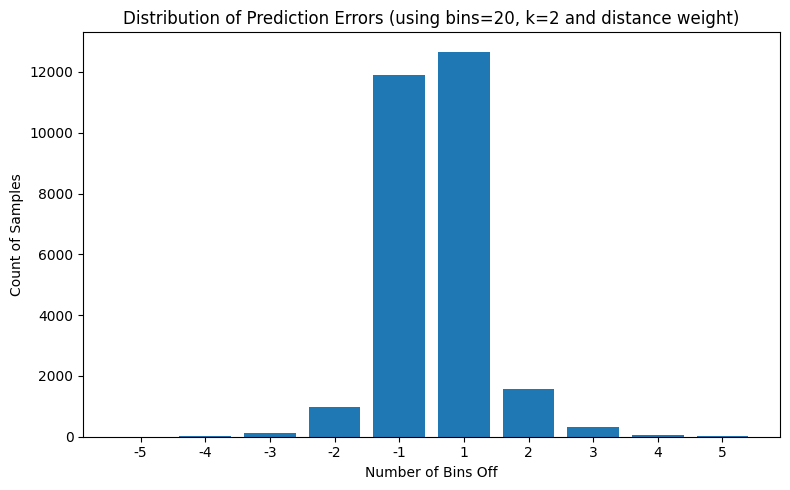

In [23]:
counts = wrong_preds['number_of_bins_off'].value_counts().sort_index()

plt.figure(figsize=(8,5))
plt.bar(counts.index.astype(str), counts.values)
plt.xlabel("Number of Bins Off")
plt.ylabel("Count of Samples")
plt.title("Distribution of Prediction Errors (using bins=20, k=2 and distance weight)")
plt.tight_layout()
plt.show()

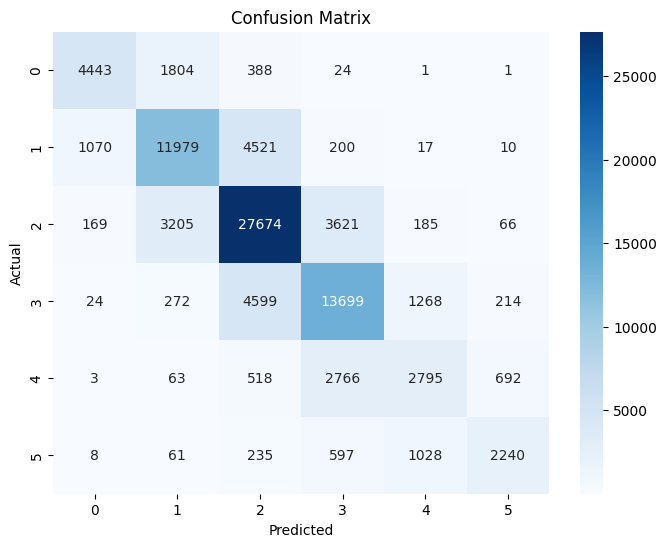

In [24]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [25]:
wrong_preds

,match_num,player_height,player_age,opponent_rank,days_of_experience,set_dominance,tb_dominance,highest_finish_position,draw_size_rolling_med_10,highest_finish_position_rolling_med_10,...,total_tb_numb_rolling_mean_10,mean_tb_diff_rolling_mean_10,median_tb_diff_rolling_mean_10,total_tb_diff_rolling_mean_10,true_rank_coded,pred_rank_coded,true_rank,pred_rank,correct,number_of_bins_off
1,24,188.0,21.0,31.0,861,0.000000,0.0,9.0,32.0,9.0,...,1.4,2.000000,2.000000,0.4,1,3,25-100,300-600,False,-2
9,254,178.0,24.0,442.0,2219,0.000000,0.0,9.0,32.0,7.0,...,1.2,2.000000,2.000000,0.4,5,4,1000-2268,600-1000,False,1
10,273,191.0,23.0,183.0,2324,0.666667,1.0,5.0,32.0,17.0,...,1.0,2.000000,2.000000,0.2,3,2,300-600,100-300,False,1
17,240,188.0,26.0,30.0,2961,0.000000,0.0,17.0,32.0,9.0,...,0.7,2.000000,2.000000,0.2,1,2,25-100,100-300,False,-1
26,718,201.0,27.0,386.0,3850,0.000000,0.0,8.0,32.0,1.0,...,1.8,2.000000,2.000000,0.6,2,3,100-300,300-600,False,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90445,374,191.0,30.0,610.0,4543,0.000000,0.0,9.0,32.0,13.0,...,2.9,-0.666667,-0.666667,-0.4,5,4,1000-2268,600-1000,False,1
90446,11,175.0,29.0,858.0,5005,1.000000,0.0,9.0,32.0,17.0,...,1.6,-0.666667,-0.666667,-0.2,5,3,1000-2268,300-600,False,2
90447,288,188.0,24.0,136.0,3010,0.000000,0.0,9.0,32.0,5.0,...,1.2,-2.000000,-2.000000,-0.4,5,3,1000-2268,300-600,False,2
90452,280,168.0,31.0,412.0,5299,0.000000,0.0,17.0,32.0,9.0,...,3.0,2.000000,2.000000,0.8,2,3,100-300,300-600,False,-1
